The new point belongs to cluster 0.
Number of clusters: 4
Number of noise points: 0


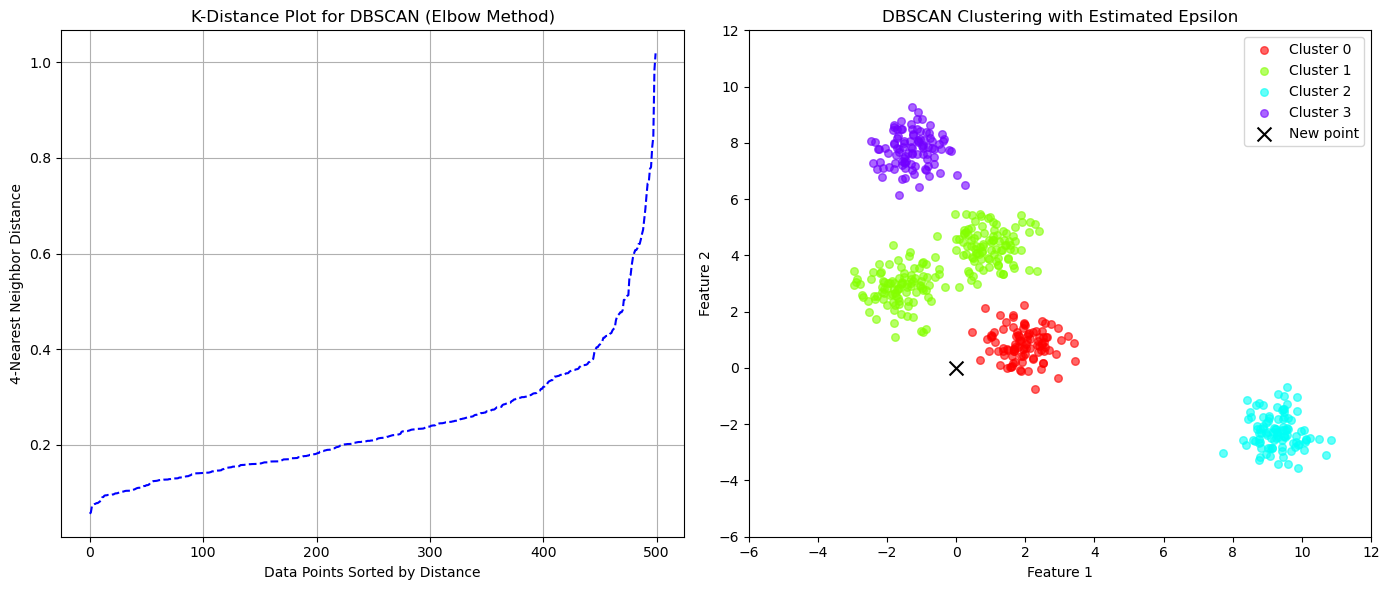

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.8  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0, 0]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()


The new point belongs to cluster 0.
Number of clusters: 1
Number of noise points: 0


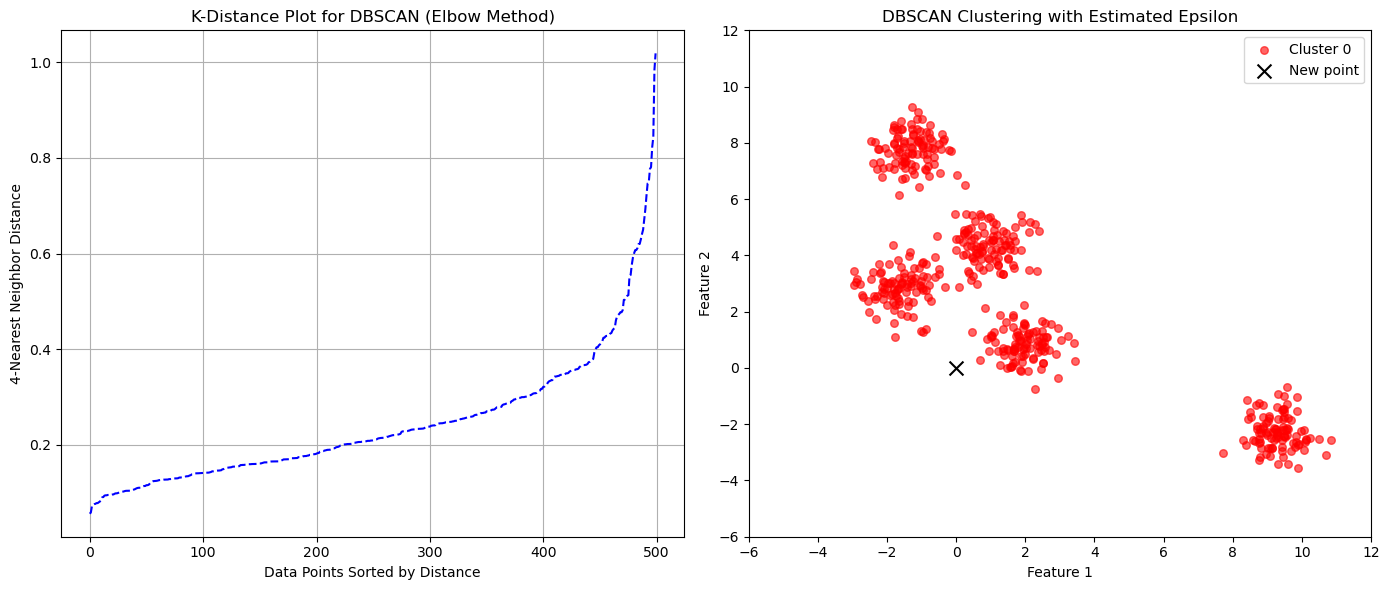

In [3]:
# Very high value of epsilon = 10

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 10  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0, 0]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()


The new point is classified as an OUTLIER.
Number of clusters: 0
Number of noise points: 500


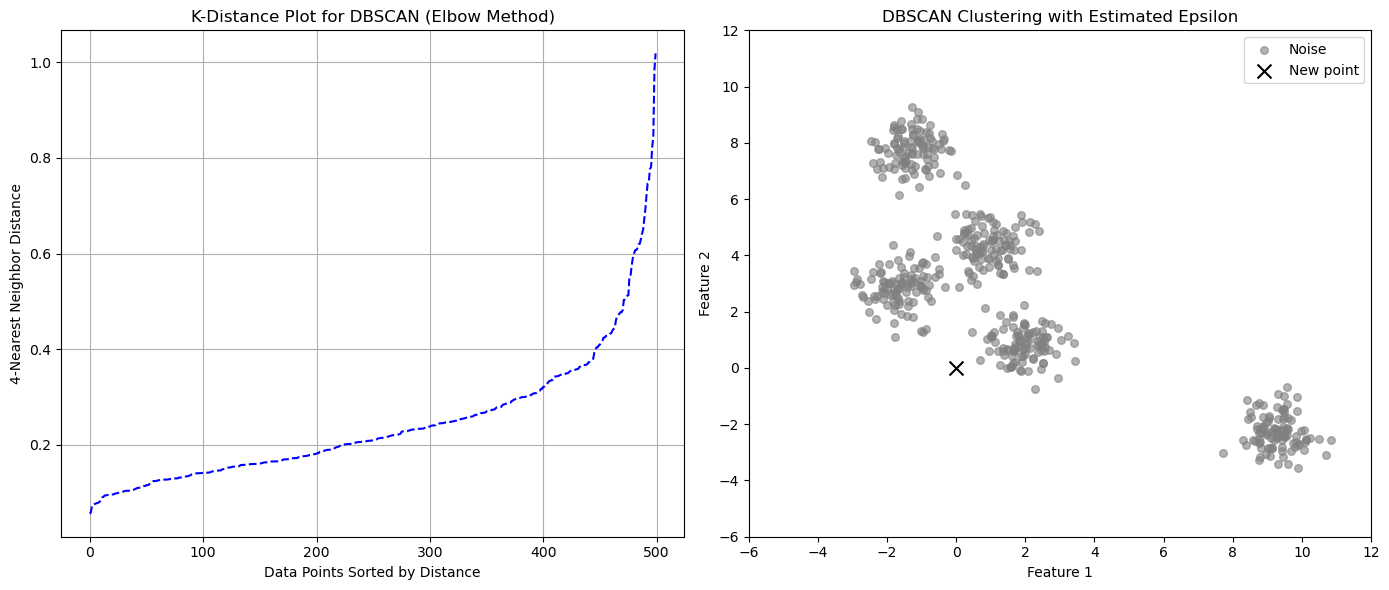

In [4]:
# Very high value of epsilon = 0.001

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.001  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0, 0]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()


The new point is classified as an OUTLIER.
Number of clusters: 5
Number of noise points: 16


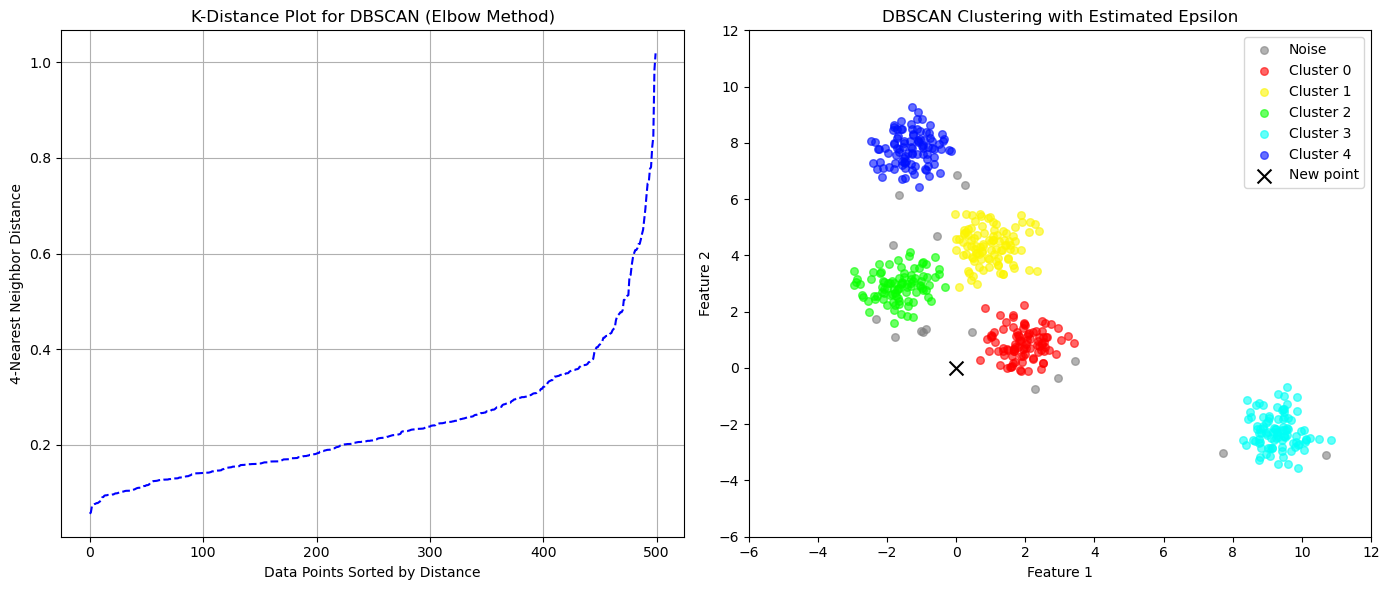

In [8]:
# Epsilon using the elbow method

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.5  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0, 0]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()


In [9]:
# 1,4 - yellow
# 4,0 - red
# 8,-2 - blue

The new point is classified as an OUTLIER.
Number of clusters: 4
Number of noise points: 27


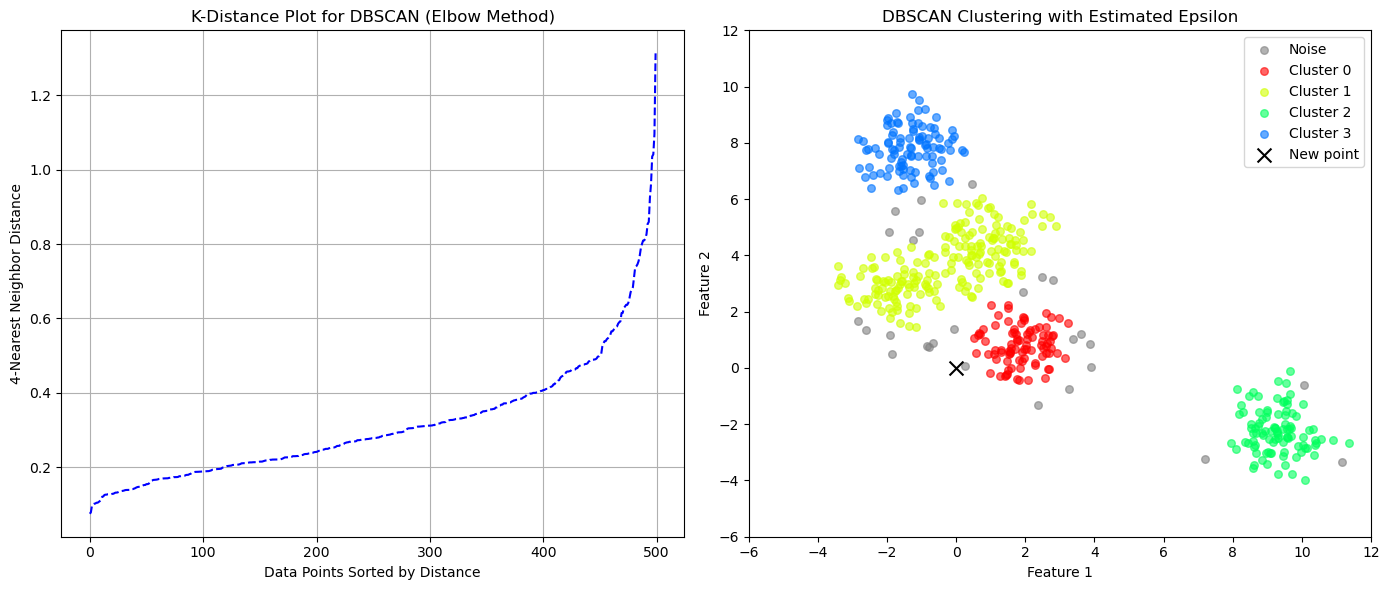

In [11]:
# Epsilon using the elbow method

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.8, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.5  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0, 0]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()


The new point belongs to cluster 1.
Number of clusters: 4
Number of noise points: 0


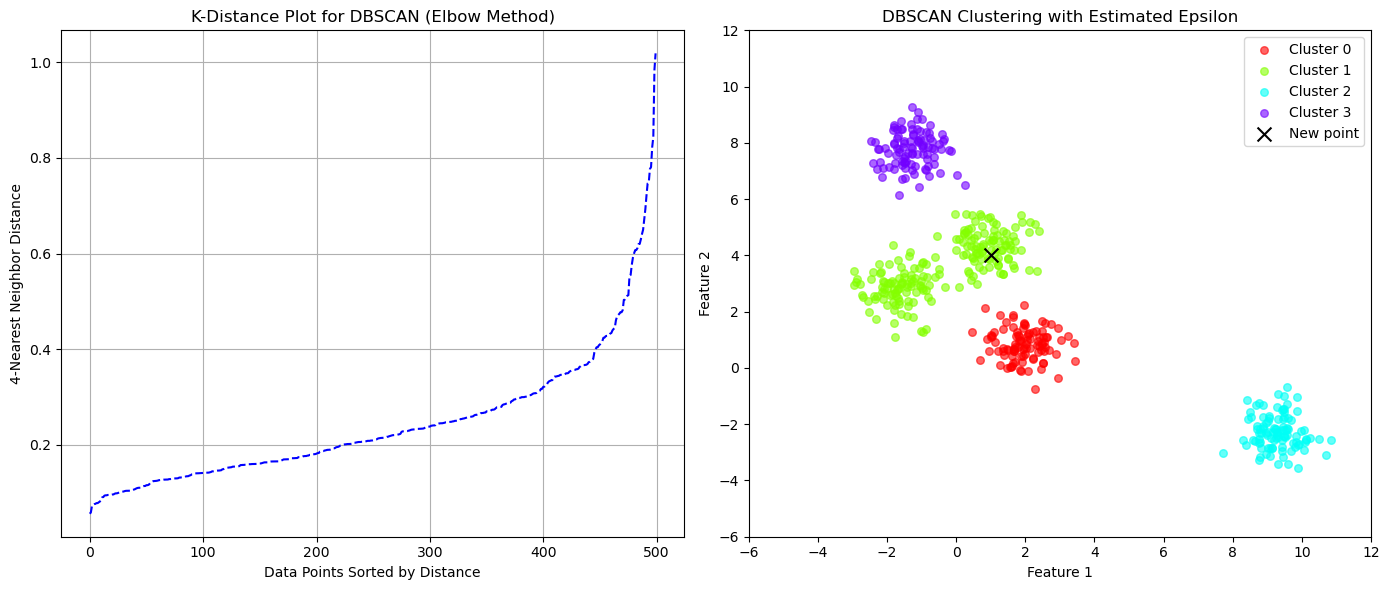

In [12]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=0)

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.8  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[1, 4]])
new_point_cluster = dbscan.fit_predict(np.vstack([X, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(X[labels == label, 0], X[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')

axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlim([-6, 12])
axes[1].set_ylim([-6, 12])
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()
